# Pre-Processing

### Import Necessary Libraries/Modules

In [2]:
# ! pip install pandas_datareader
# ! pip install yfinance

In [6]:
from pandas_datareader import data as pdr
from datetime import date, timedelta
import yfinance as yf
import pandas as pd
from importlib import reload # for reloading helper functions after changes
import matplotlib.pyplot as plt
import functions 
import matplotlib.pyplot as plt
import requests

### Prompt user for ticker symbol

In [7]:
ticker = input("Enter a US ticker symbol in all Caps:")

### Retrive data from yahoo finance and store in a dataframe

In [8]:
#Get Stock info from Yahoo Finance
yf.pdr_override()
start_date = "2015-01-01"
end_date = "2023-01-01"
yesterday = date.today() - timedelta(days=1) #end date set to yesterday because todays data my not be in
stock_data = pdr.get_data_yahoo(ticker, start=start_date, end=yesterday)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-27,104.449997,108.370003,103.540001,107.589996,107.589996,50089200
2023-04-28,107.040001,107.349998,105.089996,107.339996,107.339996,36139800
2023-05-01,106.839996,107.989998,106.820000,107.199997,107.199997,26681700
2023-05-02,107.139999,107.199997,103.709999,105.320000,105.320000,30997200
2023-05-03,105.529999,107.489998,104.959999,105.410004,105.410004,21795400


### Pulls Sentiment Data from EOD Historical Data
Source -> https://eodhistoricaldata.com/?utm_source=google_search&utm_medium=cpc&utm_campaign=Fundamentals_US&roistat_referrer=&roistat_pos=&roistat=google1_g_114763305587_474435913124_eod%20historical%20data&gad=1&gclid=CjwKCAjw0N6hBhAUEiwAXab-TSy98GsUeP42aqjNAtFWVLYkz-Zq74EPw_k5y2wAyn-u68Jw2T4LyhoCBu8QAvD_BwE

In [9]:


lowercaseTick = ticker.lower()
url = f'https://eodhistoricaldata.com/api/sentiments?s={lowercaseTick}-usd.cc,{lowercaseTick}&from=2004-01-01&to=2022-04-22&api_token=642ce398ed7ad1.39613916'

response = requests.get(url)
data = response.json()

sentiment = pd.DataFrame(data[f'{ticker}.US'])
sentiment.index = sentiment['date']
sentiment.drop('date', axis=1)
print(len(sentiment['date'].unique()))
sentiment

564


,date,count,normalized
date,,,
2022-04-22,2022-04-22,31,0.3571
2022-04-21,2022-04-21,22,0.2742
2022-04-20,2022-04-20,22,0.7069
2022-04-19,2022-04-19,21,0.5654
2022-04-18,2022-04-18,15,0.7611
...,...,...,...
2018-02-15,2018-02-15,1,0.9940
2017-12-21,2017-12-21,1,0.5570
2017-12-20,2017-12-20,1,0.9950


### Combines yahoo finance and EOD data into one dataframe

In [10]:
functions.combine_dataframes(stock_data, sentiment)

,Open,High,Low,Close,Adj Close,Volume,Sentiment
Date,,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000,NaN
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000,NaN
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000,NaN
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000,NaN
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000,NaN
...,...,...,...,...,...,...,...
2023-04-27,104.449997,108.370003,103.540001,107.589996,107.589996,50089200,NaN
2023-04-28,107.040001,107.349998,105.089996,107.339996,107.339996,36139800,NaN
2023-05-01,106.839996,107.989998,106.820000,107.199997,107.199997,26681700,NaN


# Data Cleaning

### Removes missing values from the dataframe

Note: Since sentiment is not available for several days in the original dataset, the dataframe becomes significantly smaller.

In [11]:
stock_data.dropna(inplace=True)
stock_data

,Open,High,Low,Close,Adj Close,Volume,Sentiment
Date,,,,,,,
2017-03-09,42.684502,43.035500,42.633499,42.891998,42.891998,26954000,0.9970
2017-12-01,51.520500,51.862000,50.845001,51.253502,51.253502,37762000,0.9940
2017-12-20,54.046001,54.061501,53.430000,53.678001,53.678001,28728000,0.9950
2017-12-21,53.769501,53.875999,53.450001,53.542500,53.542500,25640000,0.5570
2018-02-15,54.172501,54.705002,53.361500,54.568001,54.568001,37396000,0.9940
...,...,...,...,...,...,...,...
2022-04-18,127.000000,128.212494,126.181999,127.676498,127.676498,20808000,0.7611
2022-04-19,127.691498,130.332993,126.999496,130.009003,130.009003,26490000,0.5654
2022-04-20,130.891998,131.399002,127.500000,128.039993,128.039993,31696000,0.7069


# Feature Engineering 

### Create the boolean increase feature. Signifies if price increased the next day or not.

In [12]:
functions.create_increase_feature(stock_data, 'Open')

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Increase
Date,,,,,,,,
2017-03-09,42.684502,43.035500,42.633499,42.891998,42.891998,26954000,0.9970,NaN
2017-12-01,51.520500,51.862000,50.845001,51.253502,51.253502,37762000,0.9940,1
2017-12-20,54.046001,54.061501,53.430000,53.678001,53.678001,28728000,0.9950,1
2017-12-21,53.769501,53.875999,53.450001,53.542500,53.542500,25640000,0.5570,0
2018-02-15,54.172501,54.705002,53.361500,54.568001,54.568001,37396000,0.9940,1
...,...,...,...,...,...,...,...,...
2022-04-18,127.000000,128.212494,126.181999,127.676498,127.676498,20808000,0.7611,0
2022-04-19,127.691498,130.332993,126.999496,130.009003,130.009003,26490000,0.5654,1
2022-04-20,130.891998,131.399002,127.500000,128.039993,128.039993,31696000,0.7069,1


### Create daily_return feature

In [13]:
functions.create_daily_return(stock_data)

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Increase,daily_return
Date,,,,,,,,,
2017-03-09,42.684502,43.035500,42.633499,42.891998,42.891998,26954000,0.9970,NaN,0.207497
2017-12-01,51.520500,51.862000,50.845001,51.253502,51.253502,37762000,0.9940,1,-0.266998
2017-12-20,54.046001,54.061501,53.430000,53.678001,53.678001,28728000,0.9950,1,-0.368000
2017-12-21,53.769501,53.875999,53.450001,53.542500,53.542500,25640000,0.5570,0,-0.227001
2018-02-15,54.172501,54.705002,53.361500,54.568001,54.568001,37396000,0.9940,1,0.395500
...,...,...,...,...,...,...,...,...,...
2022-04-18,127.000000,128.212494,126.181999,127.676498,127.676498,20808000,0.7611,0,0.676498
2022-04-19,127.691498,130.332993,126.999496,130.009003,130.009003,26490000,0.5654,1,2.317505
2022-04-20,130.891998,131.399002,127.500000,128.039993,128.039993,31696000,0.7069,1,-2.852005


### Create simple moving averages
*This step was depricated for the classification model because these features had very little importance*

In [14]:
# stock_data['SMA_5'] = stock_data['Close'].rolling(window=5).mean()
# stock_data['SMA_30'] = stock_data['Close'].rolling(window=30).mean()
# stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
# stock_data['SMA_200'] = stock_data['Close'].rolling(window=100).mean()

##### Test showed that Volume, sentiment, and daily_return were the most important features in predicting. This attempts to take advantage of that by adding ratios between the features as an additional feature. 

In [15]:
functions.create_top_feature_ratios(stock_data)

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Increase,daily_return,Sentiment/volume,dr/volume
Date,,,,,,,,,,,
2017-03-09,42.684502,43.035500,42.633499,42.891998,42.891998,26954000,0.9970,NaN,0.207497,3.698894e-08,7.698176e-09
2017-12-01,51.520500,51.862000,50.845001,51.253502,51.253502,37762000,0.9940,1,-0.266998,2.632276e-08,-7.070555e-09
2017-12-20,54.046001,54.061501,53.430000,53.678001,53.678001,28728000,0.9950,1,-0.368000,3.463520e-08,-1.280980e-08
2017-12-21,53.769501,53.875999,53.450001,53.542500,53.542500,25640000,0.5570,0,-0.227001,2.172387e-08,-8.853401e-09
2018-02-15,54.172501,54.705002,53.361500,54.568001,54.568001,37396000,0.9940,1,0.395500,2.658038e-08,1.057600e-08
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18,127.000000,128.212494,126.181999,127.676498,127.676498,20808000,0.7611,0,0.676498,3.657728e-08,3.251146e-08
2022-04-19,127.691498,130.332993,126.999496,130.009003,130.009003,26490000,0.5654,1,2.317505,2.134390e-08,8.748603e-08
2022-04-20,130.891998,131.399002,127.500000,128.039993,128.039993,31696000,0.7069,1,-2.852005,2.230250e-08,-8.997997e-08


### Lag features are good for seasonal data

In [16]:
stock_data = functions.create_lag_featues(stock_data)

### Drop nans 

In [17]:
stock_data.dropna(inplace=True)
stock_data 

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Increase,daily_return,Sentiment/volume,...,Volume_lag5,Volume_lag6,Volume_lag7,daily_return_lag1,daily_return_lag2,daily_return_lag3,daily_return_lag4,daily_return_lag5,daily_return_lag6,daily_return_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-25,59.212502,59.842999,58.704498,59.694500,59.694500,33152000,0.9830,0,0.481998,2.965130e-08,...,28728000.0,37762000.0,26954000.0,-0.350998,0.504501,0.395500,-0.227001,-0.368000,-0.266998,0.207497
2018-10-10,56.820000,56.851002,54.575500,54.608002,54.608002,58980000,0.9970,0,-2.211998,1.690404e-08,...,25640000.0,28728000.0,37762000.0,0.481998,-0.350998,0.504501,0.395500,-0.227001,-0.368000,-0.266998
2018-11-05,53.626499,53.667500,51.700001,52.786499,52.786499,45358000,0.9990,0,-0.840000,2.202478e-08,...,37396000.0,25640000.0,28728000.0,-2.211998,0.481998,-0.350998,0.504501,0.395500,-0.227001,-0.368000
2018-12-04,55.649502,55.712002,53.039001,53.123501,53.123501,45630000,0.9920,1,-2.526001,2.174008e-08,...,50926000.0,37396000.0,25640000.0,-0.840000,-2.211998,0.481998,-0.350998,0.504501,0.395500,-0.227001
2019-01-14,52.667000,52.922501,52.427502,52.575500,52.575500,28490000,0.9950,0,-0.091499,3.492453e-08,...,21264000.0,50926000.0,37396000.0,-2.526001,-0.840000,-2.211998,0.481998,-0.350998,0.504501,0.395500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18,127.000000,128.212494,126.181999,127.676498,127.676498,20808000,0.7611,0,0.676498,3.657728e-08,...,25142000.0,26234000.0,32468000.0,-3.749504,1.893997,-3.885506,-3.000000,-2.295990,-0.121490,-2.201996
2022-04-19,127.691498,130.332993,126.999496,130.009003,130.009003,26490000,0.5654,1,2.317505,2.134390e-08,...,36884000.0,25142000.0,26234000.0,0.676498,-3.749504,1.893997,-3.885506,-3.000000,-2.295990,-0.121490
2022-04-20,130.891998,131.399002,127.500000,128.039993,128.039993,31696000,0.7069,1,-2.852005,2.230250e-08,...,32710000.0,36884000.0,25142000.0,2.317505,0.676498,-3.749504,1.893997,-3.885506,-3.000000,-2.295990


### Standardize the data

In [18]:
functions.standardize(stock_data)

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Increase,daily_return,Sentiment/volume,...,Volume_lag5,Volume_lag6,Volume_lag7,daily_return_lag1,daily_return_lag2,daily_return_lag3,daily_return_lag4,daily_return_lag5,daily_return_lag6,daily_return_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-25,6.639585,7.017053,7.206347,7.319329,7.319329,20.932846,99.140111,0.0,49.553296,54.457565,...,17.048328,24.980683,15.490657,43.761561,49.709757,48.951883,44.623697,43.643347,44.345601,47.644714
2018-10-10,4.212694,3.983312,2.958363,2.089696,2.089696,43.611267,99.848255,0.0,30.822224,43.728963,...,14.336892,17.048328,24.980683,49.553296,43.761561,49.709757,48.951883,44.623697,43.643347,44.345601
2018-11-05,0.973291,0.755393,0.000000,0.216936,0.216936,31.650393,99.949418,0.0,40.361580,48.038784,...,24.659314,14.336892,17.048328,30.822224,49.553296,43.761561,49.709757,48.951883,44.623697,43.643347
2018-12-04,3.025371,2.828420,1.377587,0.563421,0.563421,31.889225,99.595346,100.0,28.638994,47.799171,...,36.539407,24.659314,14.336892,40.361580,30.822224,49.553296,43.761561,49.709757,48.951883,44.623697
2019-01-14,0.000000,0.000000,0.748465,0.000000,0.000000,16.839351,99.747092,0.0,45.565827,58.895724,...,10.494521,36.539407,24.659314,28.638994,40.361580,30.822224,49.553296,43.761561,49.709757,48.951883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18,75.401438,76.340443,76.628358,77.214354,77.214354,10.094128,87.916034,0.0,50.905634,60.286737,...,13.899621,14.858457,20.332256,20.132107,59.370775,19.186502,25.343329,30.238237,45.357302,30.891768
2022-04-19,76.102876,78.490527,77.469413,79.612496,79.612496,15.083240,78.017198,100.0,62.315379,47.465730,...,24.209750,13.899621,14.858457,50.905634,20.132107,59.370775,19.186502,25.343329,30.238237,45.357302
2022-04-20,79.349379,79.571410,77.984340,77.588078,77.588078,19.654397,85.174507,100.0,26.372323,48.272522,...,20.544746,24.209750,13.899621,62.315379,50.905634,20.132107,59.370775,19.186502,25.343329,30.238237


### Visualize the Data

In [19]:
stock_data = stock_data[stock_data.index >= '2021-01-01']

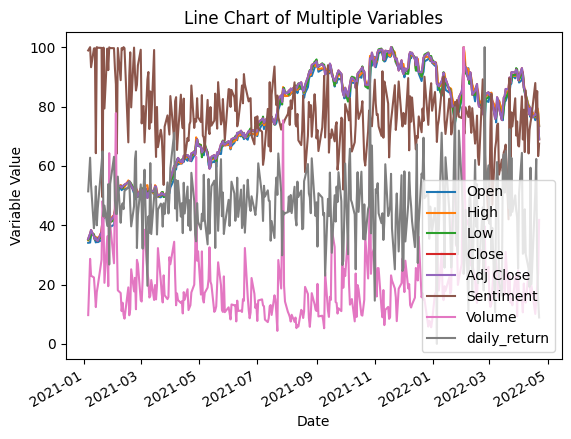

In [20]:
stock_data.plot(y=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Sentiment', 'Volume', 'daily_return' ])
plt.title('Line Chart of Multiple Variables')
plt.xlabel('Date')
plt.ylabel('Variable Value')
plt.show()

### Drop insignificant features
Initial testing yielded this feature importance graph. As you can see, several features do not influence the model much and keeping these can damage its preformance. 

The models average accuracy with all these features was 78.2%

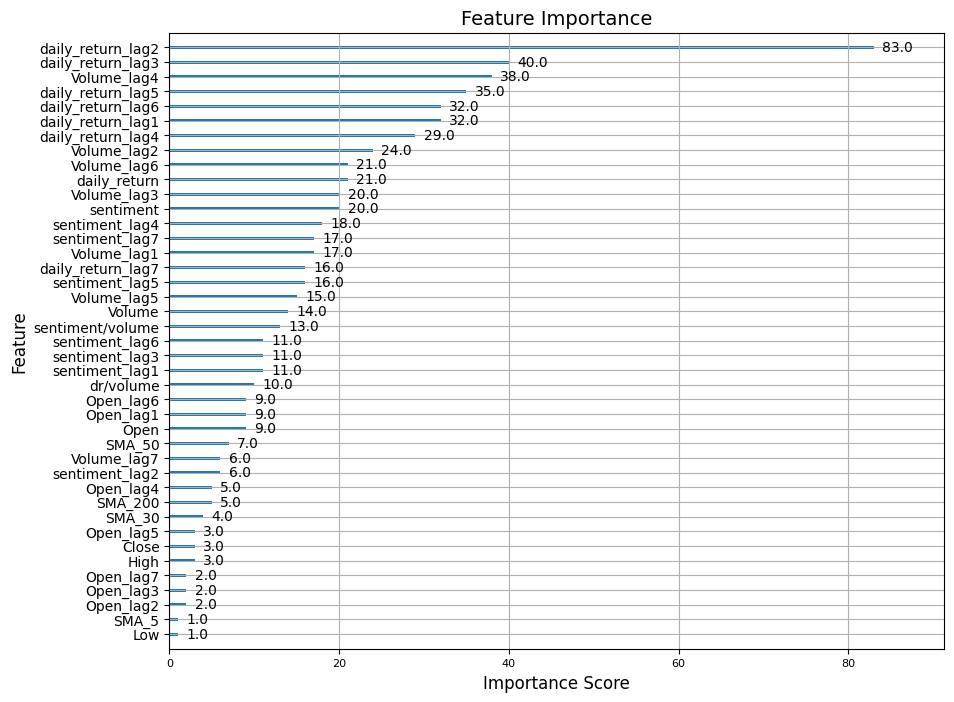

Drop all features less than 10

In [21]:
stock_data = stock_data.drop(['Low', 'Open_lag2', 'Open_lag3', 'Open_lag7', 'High', 'Close', 'Open_lag5', 'Open_lag4', 'Sentiment_lag2', 'Volume_lag7', 'Open', 'Open_lag1', 'Open_lag6'], axis=1)

# Model Selection

In [22]:
import numpy as np
# converts increase values back to boolean 
stock_data['Increase'] = np.where(stock_data['Increase'] == 100.0, 1, stock_data['Increase'])
stock_data['Increase'] = np.where(stock_data['Increase'] == 0.0, 0, stock_data['Increase'])

### Model Training

In [23]:
# Setup notebook
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.deterministic import DeterministicProcess
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# create train and test data 
X = stock_data.drop('Increase', axis=1)
y = stock_data['Increase']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()

kfold = KFold(n_splits=5)

scores = cross_val_score(model, X, y, cv=kfold)
precision = cross_val_score(model, X, y, cv=kfold, scoring='average_precision')
f1 = cross_val_score(model, X, y, cv=kfold, scoring='f1')
print("Average Precision:", np.mean(precision))
print("Average Accuracy:", np.mean(scores))
print("F1:", np.mean(f1))

Average Precision: 0.8985311366725908
Average Accuracy: 0.8559906759906759
F1: 0.8644814831287434


In [24]:
X.columns

Index(['Adj Close', 'Volume', 'Sentiment', 'daily_return', 'Sentiment/volume',
       'dr/volume', 'Sentiment_lag1', 'Sentiment_lag3', 'Sentiment_lag4',
       'Sentiment_lag5', 'Sentiment_lag6', 'Sentiment_lag7', 'Volume_lag1',
       'Volume_lag2', 'Volume_lag3', 'Volume_lag4', 'Volume_lag5',
       'Volume_lag6', 'daily_return_lag1', 'daily_return_lag2',
       'daily_return_lag3', 'daily_return_lag4', 'daily_return_lag5',
       'daily_return_lag6', 'daily_return_lag7'],
      dtype='object')

Precision = TP / (TP + FP)

Accuracy = (TP + TN) / (TP + TN + FP + FN) 

F1 score = 2 * (precision * recall) / (precision + recall)

### Plot Model Features

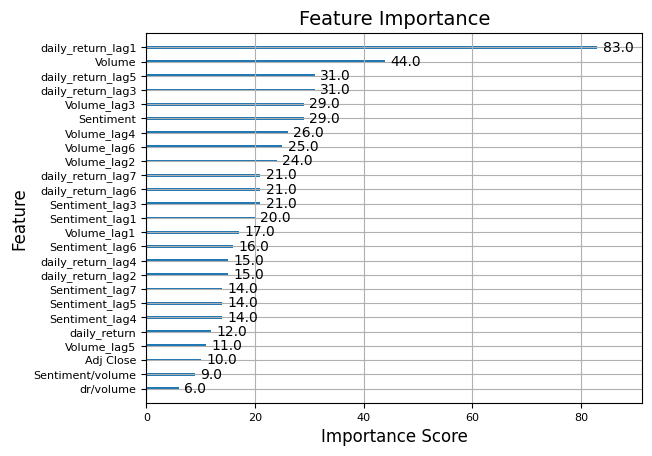

In [25]:
import xgboost.plotting as xgb_plot
model.fit(X, y)
# plot the feature importances
xgb_plot.plot_importance(model)

# customize the plot's appearance
plt.rcParams["figure.figsize"] = (10, 8)
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# show the plot
plt.show()

# Model Deployment

In [26]:
import pickle
import os
dest = './model'
if not os.path.exists(dest):
    os.makedirs(dest)
# let's serialize the trained classifier
pickle.dump(model, open(os.path.join(dest, 'increase_pred.pkl'), 'wb'), protocol=4)